# Assignment Prompt

### Introduction

<p style="color:grey">
treatments.json contains records of chemotherapeutic treatment for five patients. facts.json contains a list of observations made about one of these patients in the process of assigning a stage grouping to their disease.
</p>

### 1. Treatments question

<p style="color:grey">
What kinds of drugs are being administered to these patients? 
Hint: Consider how you might use third party reference databases to infer, standardize, and classify the information contained in these records
</p>

### 2. Facts question

<p style="color:grey">
How would you use an interoperability standard to express these data? Hint: There are many standards for exchanging and storing health information. You may want to consider not only how to record this information using one of those standards, but also to express and interrelate its meaning.
</p>

### Notes

<p style="color:grey">
As with real world data, this fake data is incomplete and messy. The exercise is subjective; there will not be a "right answer". We are interested in understanding your thought process; how you use the technologies of your choice to get to your answer; and how well you express those answers.
</p>

### Submission Process

<p style="color:grey">
Please create a private github repository with your submission. Be sure to share all code. For the writeup, HTML (including markdown) is encouraged, and other open formats are welcome.
</p>
----------------------------------------------



# Load Data

The first step is to load the data into memory, so it can be parsed and analyzed.  
The below code block assumes the two files are at the same location as the pthon notebook, and reads the contents into appropriate variables.

In [1]:
import pandas as pd
import numpy as np

df_facts = pd.read_json('facts[52].json')
df_treatments = pd.read_json('treatments[75].json')

#file line number count
print(df_facts.size)
print(df_treatments.size)
print("-----")


60
7130
-----


### Sanity check
The next step I do is make sure I am able to load the data, and that it has the type of information I would expect in it.  
The below block of code simply shows the metadata about the data I just loaded, to make sure it loaded it all. 

In [2]:
#shows first 10 rows
print(df_facts.head)
#print(df_treatments.head)

#show row and column counts
print(df_facts.shape)
print(df_treatments.shape)
print("-----")

#show mem usage and range index
print(df_facts.info(verbose=False))
print("-----")

print(df_treatments.info(verbose=False))
print("-----")


<bound method NDFrame.head of    PAT_ID  PAT_VISIT_ID  DIAGNOSIS_ID         DIAGNOSIS_NAME        NAME  \
0      61             1             1  Breast cancer, female    hist_typ   
1      61             1             1  Breast cancer, female          er   
2      61             1             1  Breast cancer, female  hist_grade   
3      61             1             1  Breast cancer, female     her2neu   
4      61             6             1  Breast cancer, female    location   
5      61             6             1  Breast cancer, female       t_val   
6      61             6             1  Breast cancer, female  path_n_val   
7      61             6             1  Breast cancer, female       n_val   
8      61             6             1  Breast cancer, female       m_val   
9      61             1             1  Breast cancer, female          pr   

                                               VALUE  
0                         Invasive lobular carcinoma  
1                      

# Data Validation

It looks like the data has all loaded properly, so we move on to the next step, which is to inspect the contents of the file to make sure it matches what is expected.  
The prompt says we should have treatment data for 5 patients, and facts for 1 patient. Lets make sure that is true

In [3]:
uTpids = df_treatments.PAT_ID.unique()
uTpids.sort()
print(uTpids)
if(len(uTpids == 5)):
    print("correct number of patient treatment records " + str(len(uTpids)) + " loaded")
else: 
    print("INCORRECT NUMBER OF PATIENT TREAMTENT RECORS LOADED")


uFpids = df_facts.PAT_ID.unique()
uFpids.sort()
print(uFpids)
if(len(uFpids == 1)):
    print("correct number of patient fact records " + str(len(uFpids)) + " loaded")
else:
    print("INCORRECT NUMBER OF PATIENT FACT RECORS LOADED")


[  1  61 110 147 159]
correct number of patient treatment records 5 loaded
[61]
correct number of patient fact records 1 loaded


## 1. Treatments

Now that the data is loaded and validated, lets begin to answer the first question: **what kinds of drugs are being administered**  
There are 50 different ways this question could be answered:  
1. what is the most commonly prescribed drugs by number of prescriptions
2. most common drugs by number of pills or mL prescribed
3. or with a bit more detail, what are the most common class of drugs
4. or what are the most common diseases treated by these drugs.
5. or what is the most common active ingredient in the prescribed drugs
6. or if we assume the pipe-delimited list means the drugs are taken together, we could ask what is the most common pairing 
7. or what is the most recent, chronologically to be taken
8. ... 50 other ways ...

This block of code will get all the unique nddf ids for all patients.  
A case could be made to grab them all for just patient 61, since that is the only patient we have in the fact file, but for now we are looking at everything

ROUTES
97
[['CIV' '15']
 ['I.V.' '23']
 ['IV Push' '84']
 ['IVPB' '97']
 ['nan' '8']
 ['sub-Q' '3']]


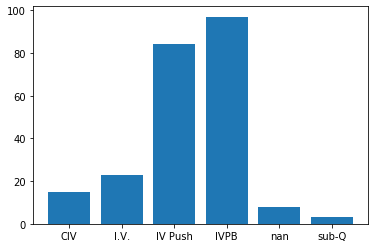

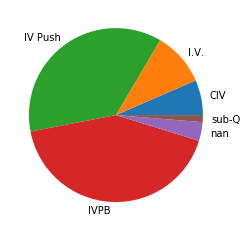

---------------------
DISPENSE FORM
155
[['Disposable syringe(s)' '3']
 ['Vial (ea)' '12']
 ['Vial (ml)' '60']
 ['Vial(s)' '155']]


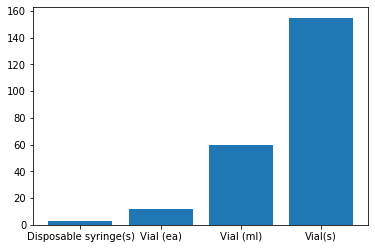

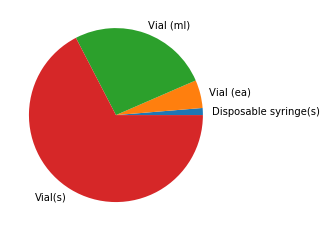

---------------------
LINE OF THERAPY
72
[['1st line' '71']
 ['1st line: Limited disease' '17']
 ['2nd line' '36']
 ['3rd line' '72']
 ['4th line' '2']
 ['Adjuvant' '12']
 ['Data loading' '20']]


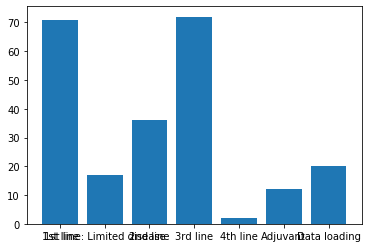

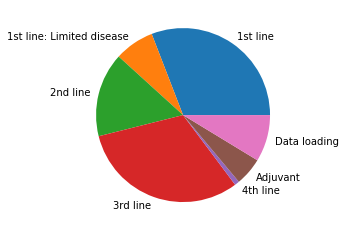

---------------------
PRIMARY DIAGNOSIS
72
[['Bladder Cancer' '17']
 ['Breast Cancer' '72']
 ['Colon Cancer' '72']
 ['NHL' '32']
 ['SCLC' '37']]


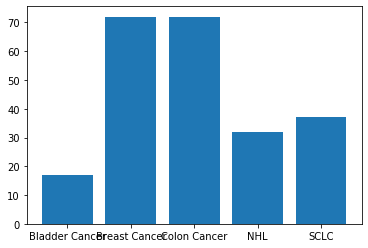

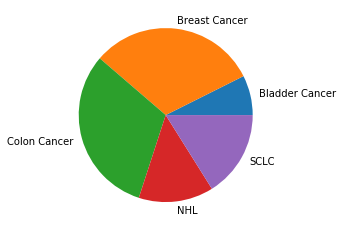

---------------------
PRIMARY DIAGNOSIS
60
[['5FU/5FU_CIV/BEVACIZ/LV/OXALI' '49']
 ['5FU/5FU_CIV/IRIN/LV' '23']
 ['BENDAM/RITUX' '12']
 ['CARBO/ETOP' '17']
 ['CIS/GEM' '10']
 ['CIS/IRIN' '2']
 ['CTX/DOX' '8']
 ['CTX/DOX/RITUX/VCR' '20']
 ['CTX/DOX/VCR' '12']
 ['ERIBU' '60']
 ['TAXOL' '11']
 ['TOPO' '6']]


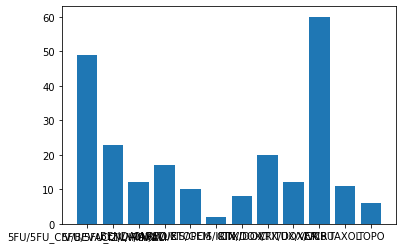

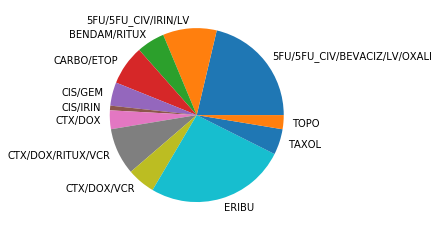

In [4]:
import matplotlib.pyplot as plt

#-------
print("ROUTES")
#-------


NDDFFull = []

NDDFUnique = df_treatments.ROUTE

for nddf in NDDFUnique:
    NDDFFull.append(nddf)

#merge jagged array into 1d array
NDDFFull = np.hstack(NDDFFull)
#save only unique values
values, counts = np.unique(NDDFFull, return_counts=True)

#merge counts and ids for later sorting
arr = np.stack((values, counts), axis=1)

print(np.max(counts))
print(arr)

plt.bar(values,counts)
plt.show()

plt.pie(counts,labels=values)
plt.show()

#-------
print("---------------------")
print("DISPENSE FORM")
#-------


NDDFFull = []

NDDFUnique = df_treatments.DISPENSE_FORM

for nddf in NDDFUnique:
    NDDFFull.append(nddf)

#merge jagged array into 1d array
NDDFFull = np.hstack(NDDFFull)
#save only unique values
values, counts = np.unique(NDDFFull, return_counts=True)

#merge counts and ids for later sorting
arr = np.stack((values, counts), axis=1)

print(np.max(counts))
print(arr)

plt.bar(values, counts)
plt.show()

plt.pie(counts, labels=values)
plt.show()


#-------
print("---------------------")
print("LINE OF THERAPY")
#-------


NDDFFull = []

NDDFUnique = df_treatments.LINE_OF_THERAPY

for nddf in NDDFUnique:
    NDDFFull.append(nddf)

#merge jagged array into 1d array
NDDFFull = np.hstack(NDDFFull)
#save only unique values
values, counts = np.unique(NDDFFull, return_counts=True)

#merge counts and ids for later sorting
arr = np.stack((values, counts), axis=1)

print(np.max(counts))
print(arr)

plt.bar(values, counts)
plt.show()

plt.pie(counts, labels=values)
plt.show()


#-------
print("---------------------")
print("PRIMARY DIAGNOSIS")
#-------


NDDFFull = []

NDDFUnique = df_treatments.PRIMARY_DIAGNOSIS

for nddf in NDDFUnique:
    NDDFFull.append(nddf)

#merge jagged array into 1d array
NDDFFull = np.hstack(NDDFFull)
#save only unique values
values, counts = np.unique(NDDFFull, return_counts=True)

#merge counts and ids for later sorting
arr = np.stack((values, counts), axis=1)

print(np.max(counts))
print(arr)

plt.bar(values, counts)
plt.show()

plt.pie(counts, labels=values)
plt.show()


#-------
print("---------------------")
print("PRIMARY DIAGNOSIS")
#-------


NDDFFull = []

NDDFUnique = df_treatments.REG_DRUG_GROUP

for nddf in NDDFUnique:
    NDDFFull.append(nddf)

#merge jagged array into 1d array
NDDFFull = np.hstack(NDDFFull)
#save only unique values
values, counts = np.unique(NDDFFull, return_counts=True)

#merge counts and ids for later sorting
arr = np.stack((values, counts), axis=1)

print(np.max(counts))
print(arr)

plt.bar(values, counts)
plt.show()

plt.pie(counts, labels=values)
plt.show()


Based on the above outout, we have mostly :
1. IV administered drugs
2. Vials
3. drugs that treat breast or colon cancer
4. primary diagnosis of ERIBU, or 5FU/5FU_CIV/BEVACIZ/LV/OXALI'

In [5]:

#-------
print("---------------------")
print("COMMON NDDF CODES")
#-------

NDDFFull = []

NDDFUnique = df_treatments.NDDF_GCN

for nddf in NDDFUnique:        
    NDDFFull.append(nddf.split("|"))

#merge jagged array into 1d array
NDDFFull = np.hstack(NDDFFull)
#save only unique values
values, counts = np.unique(NDDFFull, return_counts=True)

#merge counts and ids for later sorting
arr = np.stack((  values,counts), axis=1)

print(np.max(counts))
print(arr)



---------------------
COMMON NDDF CODES
120
[['18764' '11']
 ['25665' '6']
 ['25728' '7']
 ['25729' '7']
 ['26807' '6']
 ['36550' '24']
 ['36745' '24']
 ['36758' '24']
 ['36870' '5']
 ['38450' '4']
 ['42496' '36']
 ['44533' '17']
 ['44534' '17']
 ['44535' '17']
 ['44540' '17']
 ['44541' '17']
 ['44542' '17']
 ['46997' '33']
 ['49872' '6']
 ['53713' '5']
 ['59162' '24']
 ['59163' '24']
 ['61073' '17']
 ['61483' '21']
 ['61484' '21']
 ['61669' '60']
 ['61670' '60']
 ['61671' '60']
 ['61672' '60']
 ['61845' '13']
 ['62173' '12']
 ['62174' '6']
 ['62175' '24']
 ['63305' '6']
 ['64079' '6']
 ['64126' '21']
 ['65188' '7']
 ['66838' '120']
 ['67043' '6']
 ['68084' '7']
 ['68085' '7']
 ['68086' '7']
 ['72990' '24']
 ['72991' '24']
 ['73319' '3']
 ['75249' '36']
 ['8765' '21']
 ['8767' '21']
 ['8769' '21']
 ['8785' '4']
 ['8787' '4']
 ['8788' '4']
 ['8789' '4']
 ['8801' '15']
 ['8812' '13']
 ['8815' '21']
 ['8817' '21']
 ['8818' '21']
 ['8819' '21']
 ['8841' '13']]


The first and easiest answer to this question is this:
   There are 60 distinct drugs being administered.

The 5 most common by number of prescriptions are:
   1. 66838 at 120 times 
   2. 61669 at 60 times
   3. 61670 at 60 times
   4. 61671 at 60 times
   5. 61672 at 60 times

The supplied files do not give us details on the NDDF codes, so I took this list of NDDF codes, and built a new file with details about each, that can be loaded into our program.  

I created a file for the NDDF codes so I could show more than just a number in my answers.
I went to this website https://bioportal.bioontology.org/ and in addition to the name, I also  
found out the active ingredient, common treatments, metabolic pathways, and such, and stored them in the NDDF_ONTO.json file.

Translating those 5 drugs into something human-readable, you would get something like this:

In [6]:

df_onto = pd.read_json('NDDF_ONTO.json')
df_onto.set_index("NDDF_ID", inplace=True)

#file line number count
print(df_onto.size)
print("-----")
print(df_onto.head)

#show row and column counts
print(df_onto.shape)
print("-----")

#show mem usage and range index
print(df_onto.info(verbose=False))


#find the top 5 most prescribed drugs, joining to the ontology file I built.
results = df_onto.loc[df_onto['NDDFID'].isin(
    [values[37], values[25], values[26], values[27], values[28]])]

print(results.NAME, results.INGREDIENT)


420
-----
<bound method NDFrame.head of          NDDFID                                               NAME RXNORMCUI  \
NDDF_ID                                                                        
65188     65188          gemcitabine HCl 2 gram INTRAVEN VIAL (EA)   1719005   
66838     66838  eribulin mesylate 1 mg/2 mL (0.5 mg/mL) INTRAV...   1045456   
67043     67043  topotecan HCl 4 mg/4 mL (1 mg/mL) INTRAVEN VIA...   1799424   
68084     68084  gemcitabine HCl 1 gram/26.3 mL (38 mg/mL) INTR...   1720960   
68085     68085  gemcitabine HCl 2 gram/52.6 mL (38 mg/mL) INTR...   1720975   
68086     68086  gemcitabine HCl 200 mg/5.26 mL (38 mg/mL) INTR...   1720977   
72990     72990                                                                
72991     72991                                                                
73319     73319  pegfilgrastim 6 mg/0.6 mL deliverable (0.64 mL...   2549331   
75249     75249       bendamustine HCl 25 mg/mL INTRAVEN VIAL (ML)   1726097   


It looks like the most comon drug by number of prescriptions is:
**FLUOROURACIL**, which :

In [7]:
print("works via the " + results.NDFRT_MECH.values[1] + " pathway")
print("---")
print("which has these effects on the cells ")
print(results.NDF_EFFECT.values[1])
print("---")
print("and which may be used to treat these diseases")
print( results.NDFRT_MAY_TREAT.values[1])



works via the Thymidylate Synthetase Inhibitors [MoA] pathway
---
which has these effects on the cells 
['Decreased DNA Integrity [PE]', 'Decreased RNA Integrity [PE]']
---
and which may be used to treat these diseases
['Rectal Neoplasms [Disease/Finding]', 'Breast Neoplasms [Disease/Finding]', 'Keratosis [Disease/Finding]', 'Carcinoma, Basal Cell [Disease/Finding]', 'Stomach Neoplasms [Disease/Finding]', 'Colonic Neoplasms [Disease/Finding]', 'Pancreatic Neoplasms [Disease/Finding]', 'Head and Neck Neoplasms [Disease/Finding]']


---------------------
POSSIBLE TREATMENTS
19
[['Alzheimers' '1']
 ['Anemia, Megaloblastic [Disease/Finding]' '6']
 ['Arthritis, Rheumatoid [Disease/Finding]' '1']
 ['Astrocytoma [Disease/Finding]' '1']
 ['Bone Marrow Cancer' '1']
 ['Breast Neoplasms [Disease/Finding]' '19']
 ['Carcinoma, Basal Cell [Disease/Finding]' '4']
 ['Carcinoma, Non-Small-Cell Lung [Disease/Finding]' '13']
 ['Carcinoma, Pancreatic Ductal [Disease/Finding]' '6']
 ['Carcinoma, Small Cell [Disease/Finding]' '3']
 ['Colonic Neoplasms [Disease/Finding]' '7']
 ['Colorectal Neoplasms [Disease/Finding]' '7']
 ['Crohn Disease [Disease/Finding]' '3']
 ['Drug Toxicity [Disease/Finding]' '6']
 ['Esophageal Neoplasms [Disease/Finding]' '1']
 ['Fallopian Tube Neoplasms [Disease/Finding]' '1']
 ['Folic Acid Deficiency [Disease/Finding]' '6']
 ['Gastrointestinal Neoplasms [Disease/Finding]' '3']
 ['Glioblastoma [Disease/Finding]' '1']
 ['Granulomatosis with Polyangiitis [Disease/Finding]' '1']
 ['Head and Neck Neoplasms [Diseas

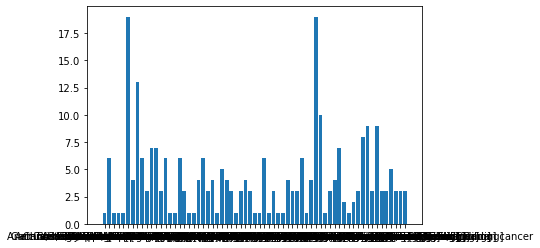

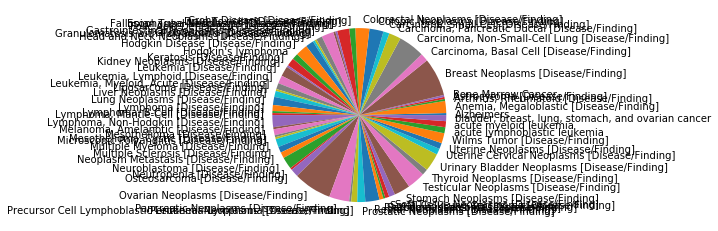

In [8]:
#-------
print("---------------------")
print("POSSIBLE TREATMENTS")
#-------


NDDFFull = []

NDDFUnique = df_onto.NDFRT_MAY_TREAT

for nddf in NDDFUnique:
    NDDFFull.append(nddf)

#merge jagged array into 1d array
NDDFFull = np.hstack(NDDFFull)
#save only unique values
values, counts = np.unique(NDDFFull, return_counts=True)

#merge counts and ids for later sorting
arr = np.stack((values, counts), axis=1)

print(np.max(counts))
print(arr)

plt.bar(values, counts)
plt.show()

plt.pie(counts, labels=values)
plt.show()


The above findings further show that this patient has received mostly drugs that treat Cancer.  
Specifically breast, ovarian, and colon cancers.

## 2. Facts

<p style="color:grey">
How would I use an interop standard to express the fact data.
</p>

#### Encoding

This question is one of the largest in healthcare, and often times the reason healthcare can be so inefficient.  
This applies not only to sharing data across organizations, but also how a single organization stores data internally.  
Consider an organization that lets providers add diagnoses to the patients problem list as free-text, something like "brest cncr".  
That data is going to be unusable, becuase it is misspelled, unspecific, and uncoded; meaning it can not be linked to knowledge repositories.

When storing and sharing data, there are 2 different levels that need to be achieved: first is syntactic, and second is semantic.  
syntactic means you know how to parse the data from one organization to another, think HL7v2.  

The real goal though is semantic interoperability. This means that you also understnad the concepts that are being shared.  
this is where we most often fall short within healthcare data.  

for instance, in the treatments file, there are drugs administered as IV, I.V., Intravenous, IVPB, IV Push.
These ostensibly all mean the same thing, but the computer system wont know that without a lot of massaging of the data by a human.  

Instead, we need to communicate with standardized terminology codes.  
For instance, instead of sending plain text that needs to be mapped and interpreted by the receiver, simply send a LOINC code of LA18623-1.  
This code is now shared across all organizations, and everyone knows that this code means IV Push.  
No massaging or guessing about the data.  

There are many initiatives trying to do this; HIE/RHIOs and FHIR come to mind.


#### Ontologies

The majority of the Fact file data appears to be diagnosis related, with a few attributes added with each record, such as location, status, and size of the cancer.  
These concepts are easily expressed and encoded into either SNOMED or ICD9/10 codes. 

Once complex concepts like these are stored in a SNOMED code, further details can be mapped onto it using an ontology.  
There are plenty of examples of ontologies, such as OWL, MESH, NDFRT, NCIT.  

Think of the DIKW pyramid: https://en.wikipedia.org/wiki/DIKW_pyramid.  
the cancer diagnosis is the data  
the snomed concept in the information  
the ontology can provide the knowledge .  

an ontology is larger that a single diagnosis or concept, and has many attributes attached to concepts.  
with an ontology, I can learn that my SNOMED code is linked to an attribute of "organ system" for example.  
this could tell me that the particular cancer diagnosis I have relates to the "heart" organ system.    
that knowledge lets me know this disease affects the heart.   
I now know I can scan the patients active medications for any that may have contraindications with heart disease or cancer, and alert the clinician to this fact, as an example.  

or an ontology could tell me that the snomed code I have for the patients diagnosis is linked to a particular dna sequence.   
I can then look for any clinical trials that are targeting that dna sequence and alert the clinician to enroll the patient into that study.  

None of which would be possible if I stored my data a plain-text diagnosis of "cancer, breast".   
Coding data matters, and I have published a paper on the importance of this fact on problem lists in the EHR.  
You can see the paper here: https://academic.oup.com/jamia/article/25/5/603/4935219?guestAccessKey=91d3a9f8-d63d-4803-baef-0cbe64a58eb6  
and another paper that shows how we solved the free-text vs coding problem with software I wrote at IHC: https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4419930/  



### Example encoding

Using the FHIR standard, we can combine most of the fact table data into a single message, using the Condition model, and adding attributes to further refine the concept.  
This is an example of what a breast cancer condition might look like coded in fhir.  


In [10]:
{
  "resourceType": "Condition",
  "id": "f203",
  "clinicalStatus": {
    "coding": [
      {
        "system": "http://terminology.hl7.org/CodeSystem/condition-clinical",
        "code": "active"
      }
    ]
  },
  "verificationStatus": {
    "coding": [
      {
        "system": "http://terminology.hl7.org/CodeSystem/condition-ver-status",
        "code": "confirmed"
      }
    ]
  },
  "category": [
    {
      "coding": [
        {
          "system": "http://snomed.info/sct",
          "code": "55607006",
          "display": "Problem"
        },
        {
          "system": "http://terminology.hl7.org/CodeSystem/condition-category",
          "code": "problem-list-item"
        }
      ]
    }
  ],
  "severity": {
    "coding": [
      {
        "system": "http://snomed.info/sct",
        "code": "371924009",
        "display": "Moderate to severe"
      }
    ]
  },
  "code": {
    "coding": [
      {
        "system": "http://snomed.info/sct",
        "code": "134405005",
        "display": "Breast Cancer"
      }
    ]
  },
  "bodySite": [
    {
      "coding": [
        {
          "system": "http://snomed.info/sct",
          "code": "80248007",
          "display": "Left Breast"
        }
      ]
    }
  ],
  "subject": {
    "reference": "Patient/f201",
    "display": "Roel"
  },
  "encounter": {
    "reference": "Encounter/f203",
    "display": "Roel's encounter on March elevanth"
  },
  "onsetDateTime": "2013-03-08",
  "recordedDate": "2013-03-11",
  "participant": [
    {
      "function": {
        "coding": [
          {
            "system": "http://terminology.hl7.org/CodeSystem/provenance-participant-type",
            "code": "author",
            "display": "Author"
          }
        ]
      },
      "actor": {
        "reference": "Practitioner/f201"
      }
    }
  ],
  "evidence": [
    {
      "reference": {
        "reference": "DiagnosticReport/f202",
        "display": "Diagnostic report for Roel's sepsis"
      }
    }
  ]
}

{'resourceType': 'Condition',
 'id': 'f203',
 'clinicalStatus': {'coding': [{'system': 'http://terminology.hl7.org/CodeSystem/condition-clinical',
    'code': 'active'}]},
 'verificationStatus': {'coding': [{'system': 'http://terminology.hl7.org/CodeSystem/condition-ver-status',
    'code': 'confirmed'}]},
 'category': [{'coding': [{'system': 'http://snomed.info/sct',
     'code': '55607006',
     'display': 'Problem'},
    {'system': 'http://terminology.hl7.org/CodeSystem/condition-category',
     'code': 'problem-list-item'}]}],
 'severity': {'coding': [{'system': 'http://snomed.info/sct',
    'code': '371924009',
    'display': 'Moderate to severe'}]},
 'code': {'coding': [{'system': 'http://snomed.info/sct',
    'code': '134405005',
    'display': 'Breast Cancer'}]},
 'bodySite': [{'coding': [{'system': 'http://snomed.info/sct',
     'code': '80248007',
     'display': 'Left Breast'}]}],
 'subject': {'reference': 'Patient/f201', 'display': 'Roel'},
 'encounter': {'reference': 'Enco

## End

I can go into a lot more detail, but I am trying to stick to your 2-4 hour time limit.  
Please do not hesitate to ask me further questions about this if you need.  